### Project 
Business Problem :

- Problem: 
    - The company faces inefficiencies in its bonus allocation process, leading to suboptimal use of resources and customer dissatisfaction.

- Goal: 
    - Maximize customer satisfaction and spending, while staying within a budget. Ensure that bonuses are allocated to the right customers at the right time to optimize retention and spending.

- Solution: 
    - Use machine learning to predict how much bonus each customer should receive, based on features like spending behavior, loyalty, and demographics.

In [ ]:
######################### About the Datset Values ############################################### 

#### About the Dataset

customer_id: 
- Unique identifier for each customer (integer, 1 to 10,000).

customer_name: 
- The name of the customer
age: 
- Age of the customer, generated using a normal distribution with a mean of 40 and a standard deviation of 15, clipped between 18 and 70.

income_level: 
- The income level of the customer, categorized as Low, Medium, or High, with the following probabilities: 40% Low, 40% Medium, and 20% High.

days_since_last_purchase: 
- Number of days since the customer made their most recent purchase. This is generated using a log-normal distribution to reflect a higher concentration of recent purchases.

active_days: 
- The number of days the customer was active during the past year (between 30 and 365 days).

total_number_of_purchases: 
- Total number of purchases made by the customer in the past year. Generated using a normal distribution and clipped between 100 and 5000.

total_amount_spent: 
- Total amount of money spent by the customer in the past year. This is generated using a log-normal distribution, reflecting varied spending patterns between customers, and clipped between 500 and 50,000.

avg_amount_spent: 
- Average amount spent per purchase, calculated as total_amount_spent / total_number_of_purchases.

days_since_first_purchase: 
- The number of days since the customer made their first purchase. This is generated randomly between 1 and 1000.

purchase_frequency: 
- The frequency of purchases made by the customer per year (between 0.5 and 2.0 purchases per year).

last_purchase_amount: 
- The amount spent by the customer in their most recent purchase. This is randomly generated between 50 and 5000.

seasonal_purchase_behavior: 
- A binary indicator (0 or 1) of whether the customer exhibits seasonal purchase behavior (1 = buys seasonally, 0 = does not).



refunds: 
- The number of refunds requested by the customer in the past year (between 0 and 5).



location: 
- The location of the customer, categorized as Urban, Suburban, or Rural.


bonus_amount_received: 
- A calculated bonus amount received by the customer, based on a percentage (0.05%) of the total amount spent, plus an additional amount based on the number of purchases. This introduces complexity and reflects customer activity.


## Step 1: Load the Dataset

In [45]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_data_with_bonus_amount.csv' 
data = pd.read_csv(file_path)

In [46]:
##
# Display the first few rows
data.head()


,customer_id,customer_name,age,income_level,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,refunds,location,bonus_amount_received
0,1,Kyle Rogers,18,Medium,365,217,100,45652.568412,456.525684,877,0.706352,2987.613718,0,5,Rural,24.826284
1,2,Brian Schwartz,39,Low,365,258,2653,4277.094805,1.612173,911,1.480141,388.023592,0,0,Suburban,55.198547
2,3,Brooke Hoffman,30,Low,1,250,476,48111.691777,101.074983,96,1.678426,176.329616,0,0,Urban,33.575846
3,4,Thomas Allen,18,Medium,365,77,100,47829.067377,478.290674,702,1.511669,2325.794544,0,4,Urban,25.914534
4,5,Joshua Lopez,61,Medium,365,312,948,15231.434496,16.066914,836,0.731040,1578.717741,0,2,Urban,26.575717


In [47]:
# Check basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10000 non-null  int64  
 1   customer_name               10000 non-null  object 
 2   age                         10000 non-null  int64  
 3   income_level                10000 non-null  object 
 4   days_since_last_purchase    10000 non-null  int64  
 5   active_days                 10000 non-null  int64  
 6   total_number_of_purchases   10000 non-null  int64  
 7   total_amount_spent          10000 non-null  float64
 8   avg_amount_spent            10000 non-null  float64
 9   days_since_first_purchase   10000 non-null  int64  
 10  purchase_frequency          10000 non-null  float64
 11  last_purchase_amount        10000 non-null  float64
 12  seasonal_purchase_behavior  10000 non-null  int64  
 13  refunds                     1000

In [48]:
# Check for null values
data.isnull().sum()


customer_id                   0
customer_name                 0
age                           0
income_level                  0
days_since_last_purchase      0
active_days                   0
total_number_of_purchases     0
total_amount_spent            0
avg_amount_spent              0
days_since_first_purchase     0
purchase_frequency            0
last_purchase_amount          0
seasonal_purchase_behavior    0
refunds                       0
location                      0
bonus_amount_received         0
dtype: int64

### Step 2: Exploratory Data Analysis (EDA)

In [49]:
# Summary statistics
data.describe()


,customer_id,age,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,refunds,bonus_amount_received
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.068100,225.980000,197.784900,1230.990400,32618.798035,95.345745,498.219600,1.249257,2547.695629,0.492000,2.514700,37.729126
std,2886.89568,13.706249,152.421574,97.099814,1147.182219,40366.088733,150.772242,289.194148,0.433424,1420.859724,0.499961,1.710461,24.720808
min,1.00000,18.000000,1.000000,30.000000,100.000000,500.000000,0.125313,1.000000,0.500067,51.514586,0.000000,0.000000,2.250000
25%,2500.75000,30.000000,51.000000,114.000000,100.000000,9303.488566,8.307867,247.000000,0.865879,1333.373164,0.000000,1.000000,18.736701
50%,5000.50000,40.000000,301.000000,198.000000,953.000000,25490.431014,24.798666,503.500000,1.248907,2562.478034,0.000000,3.000000,32.396186
75%,7500.25000,50.000000,365.000000,282.000000,1986.000000,50000.000000,91.575634,749.000000,1.626280,3761.936291,1.000000,4.000000,54.020179
max,10000.00000,70.000000,365.000000,365.000000,5000.000000,647593.064769,500.000000,1000.000000,1.999997,4998.355926,1.000000,5.000000,125.000000


In [50]:
##shape of dataset
data.shape

(10000, 16)

### Step 4: Visualization

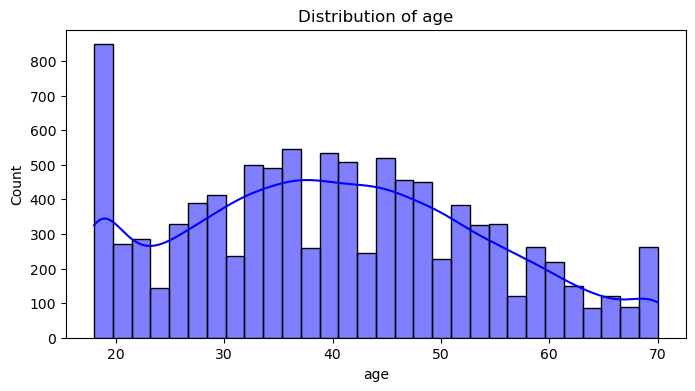

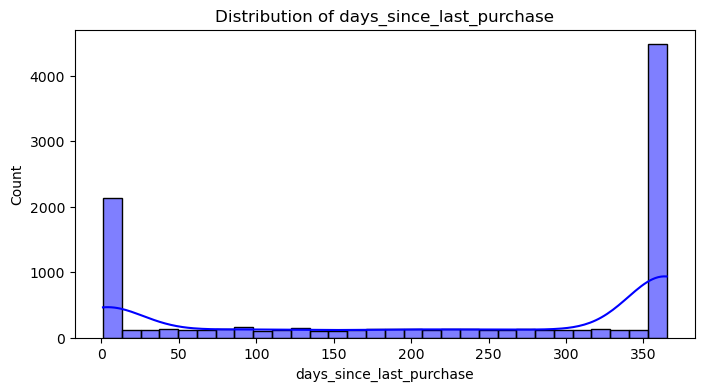

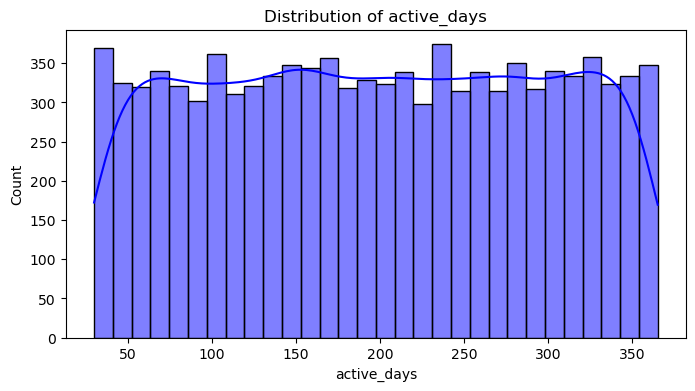

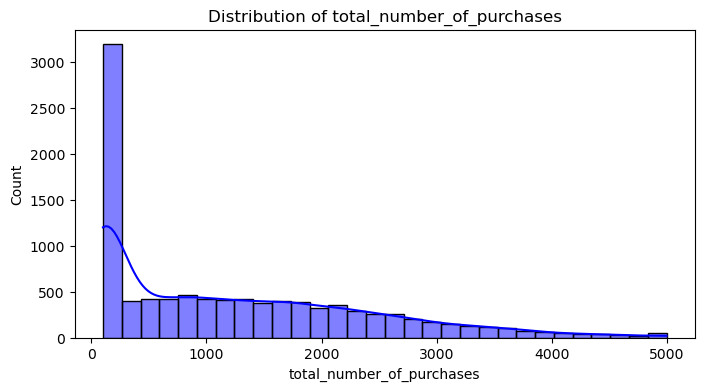

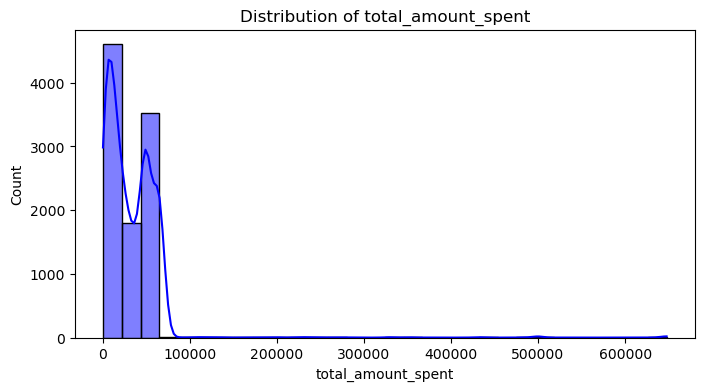

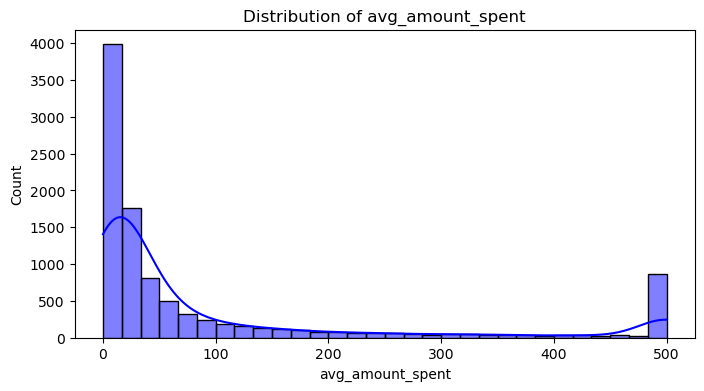

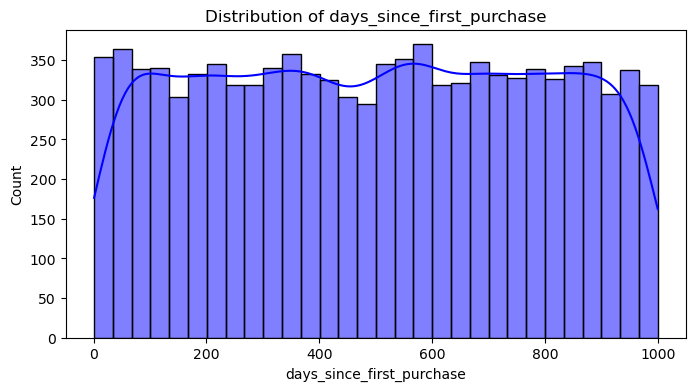

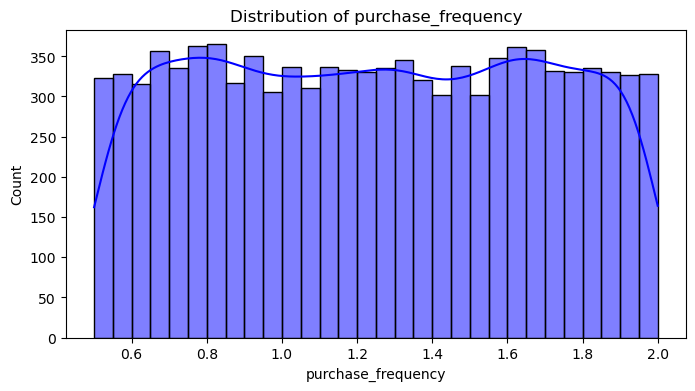

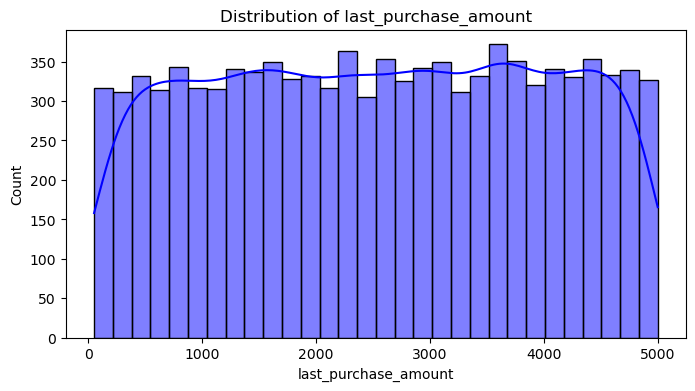

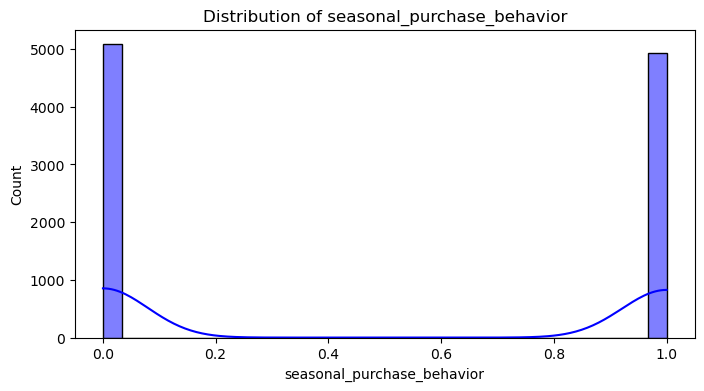

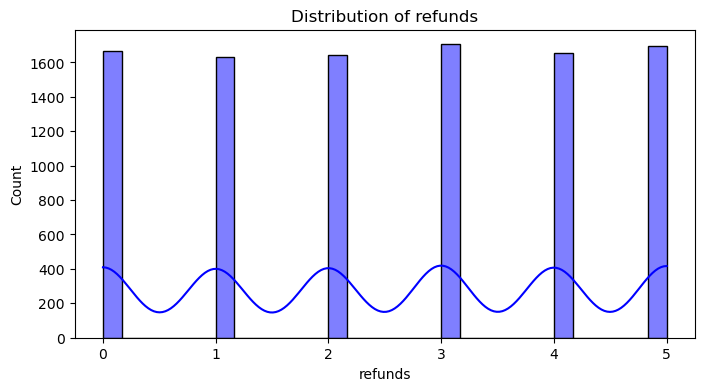

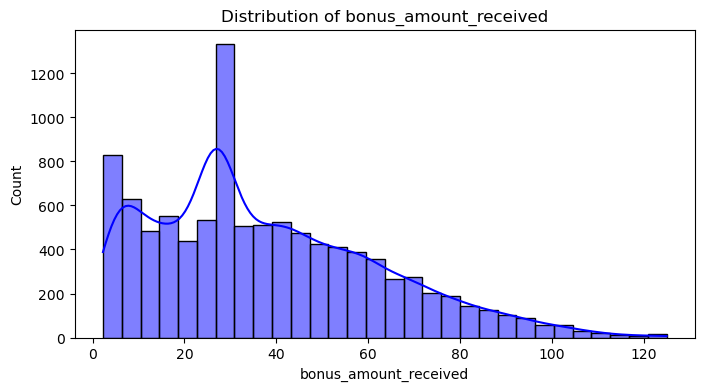

In [51]:
# Check the distribution of numerical features
numerical_columns = data.select_dtypes(exclude = 'object')
numerical_columns = numerical_columns.drop(columns = 'customer_id')
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()


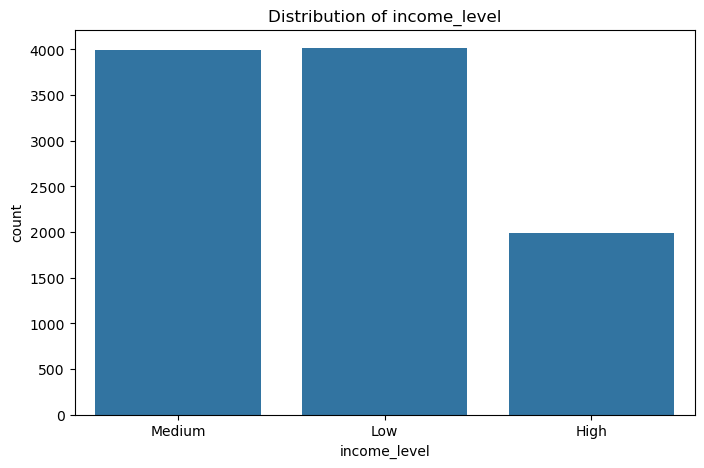

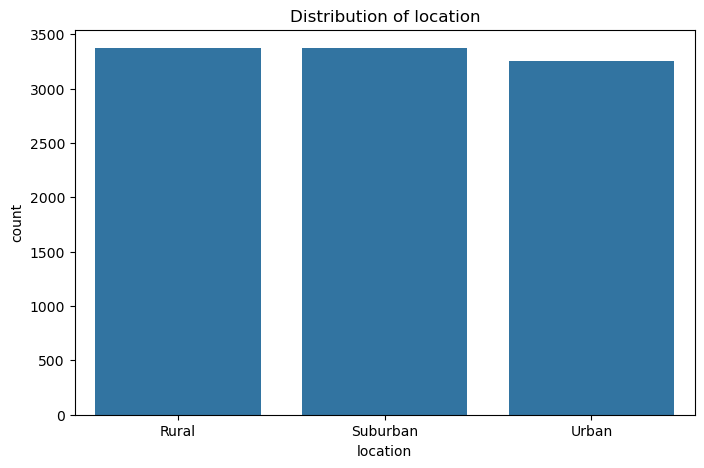

In [52]:
### Visualize Categorical Variables:
categorical_columns = ['income_level', 'location']
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x = data[col])
    plt.title(f"Distribution of {col}")
    plt.show()


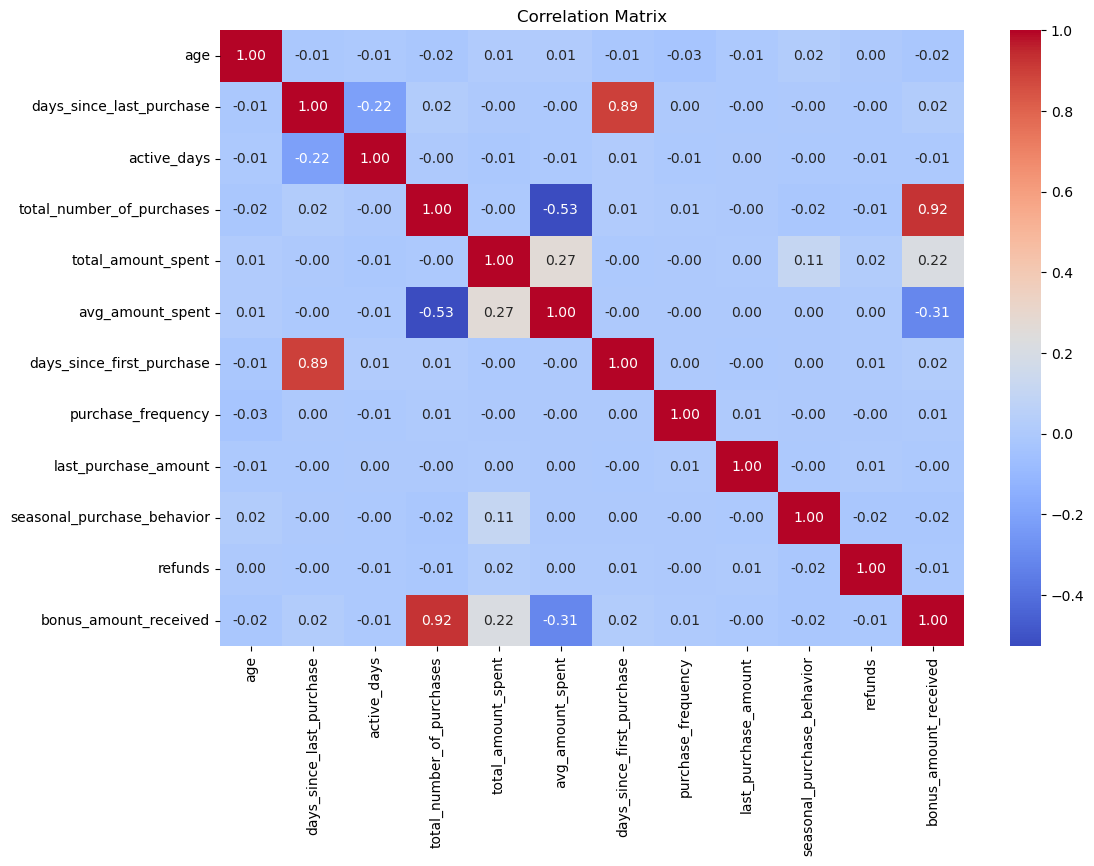

In [53]:
## Visualize correlations between numerical features:
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


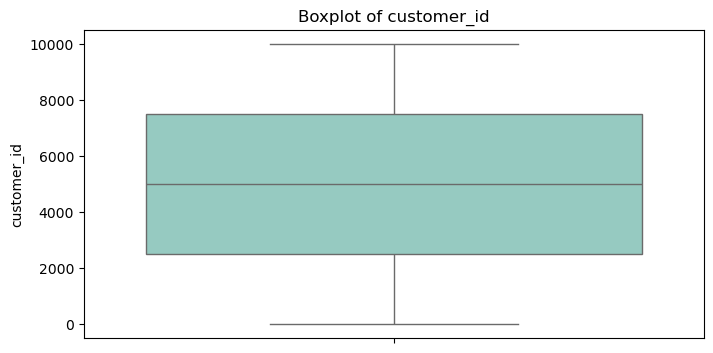

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


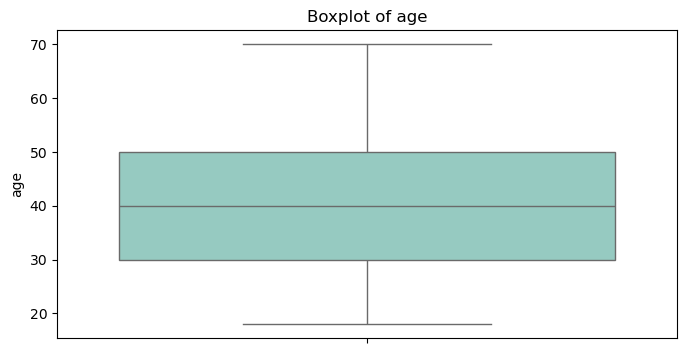

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


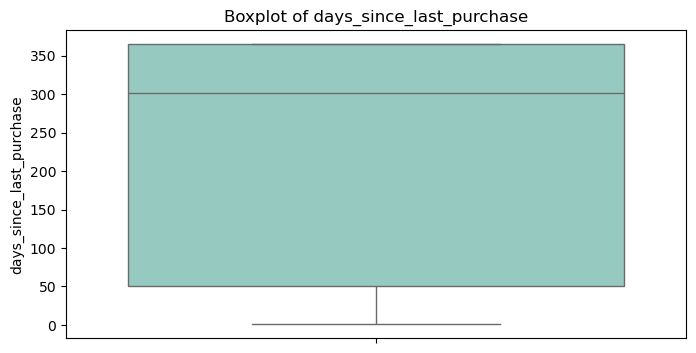

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


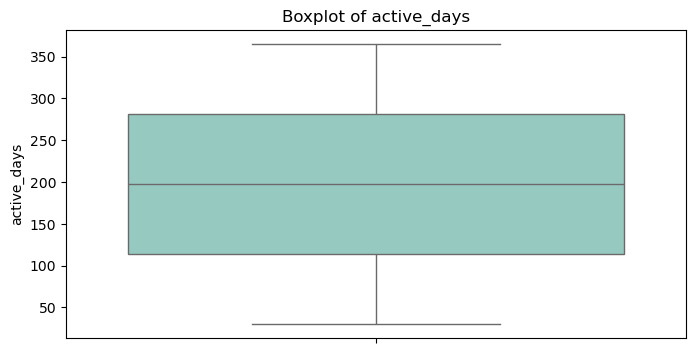

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


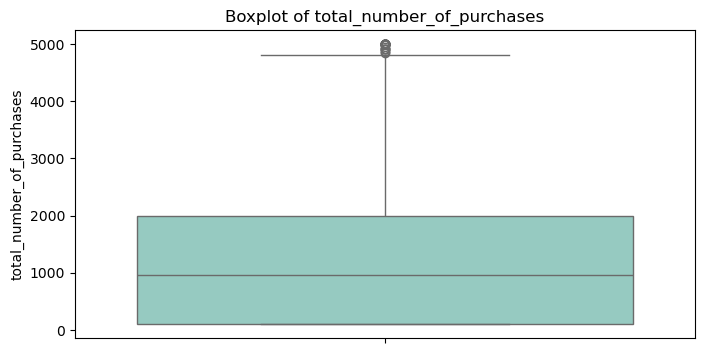

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


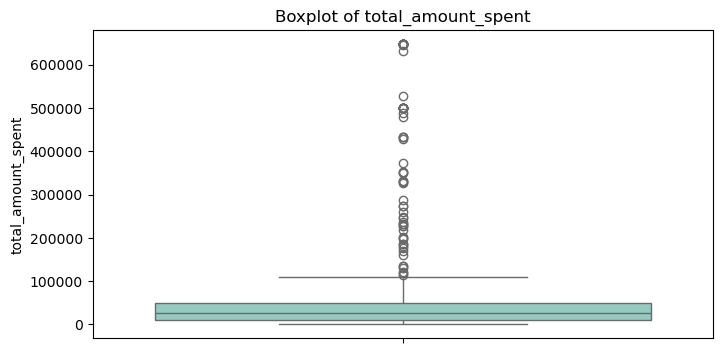

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


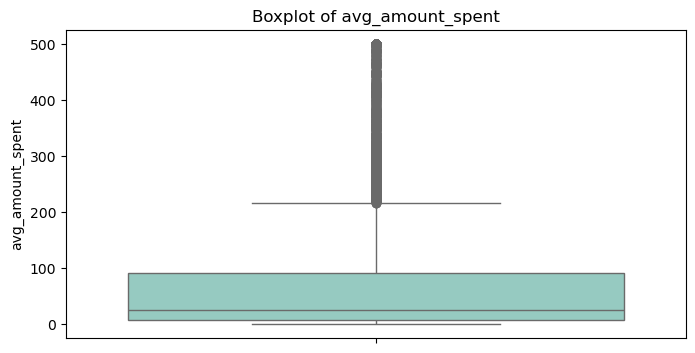

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


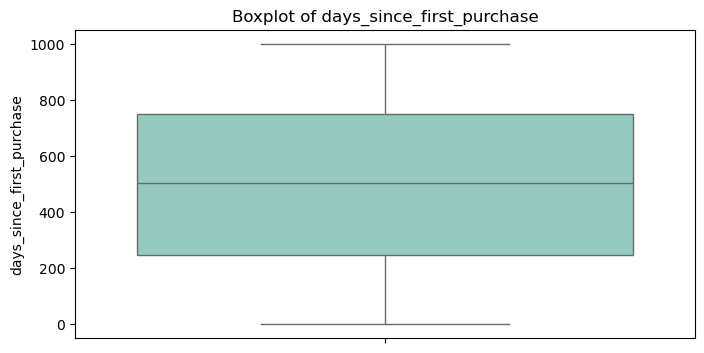

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


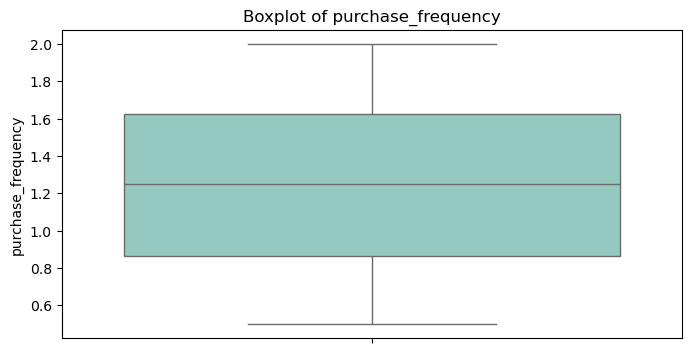

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


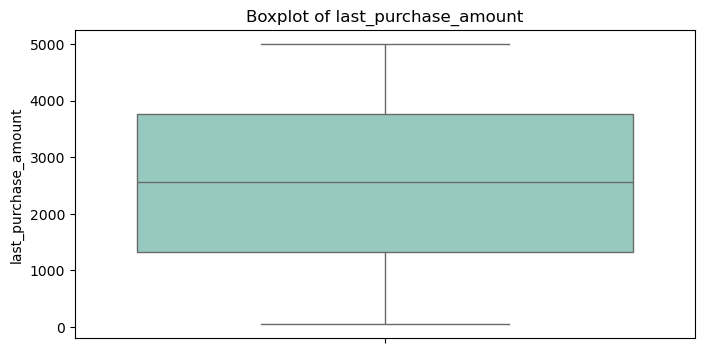

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


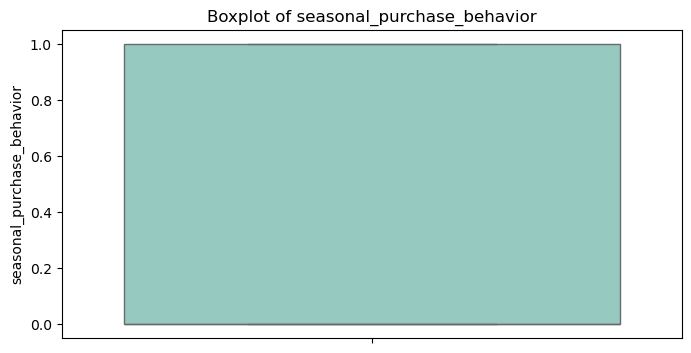

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


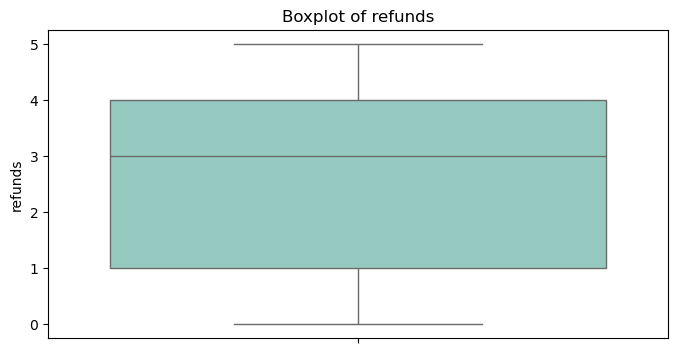

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\1467143205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='Set3')


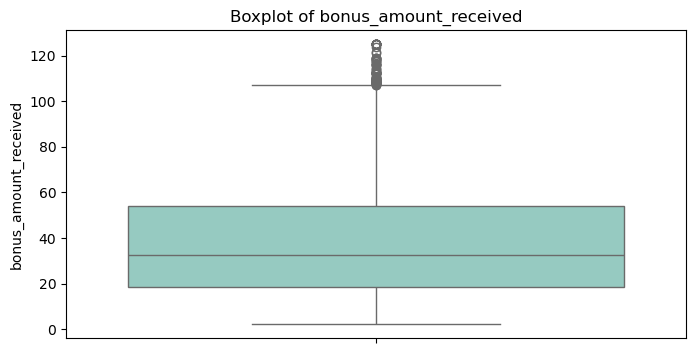

In [54]:
### Outliers Check:
# Use box plots to detect anomalies
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col], palette='Set3')
    plt.title(f"Boxplot of {col}")
    plt.show()


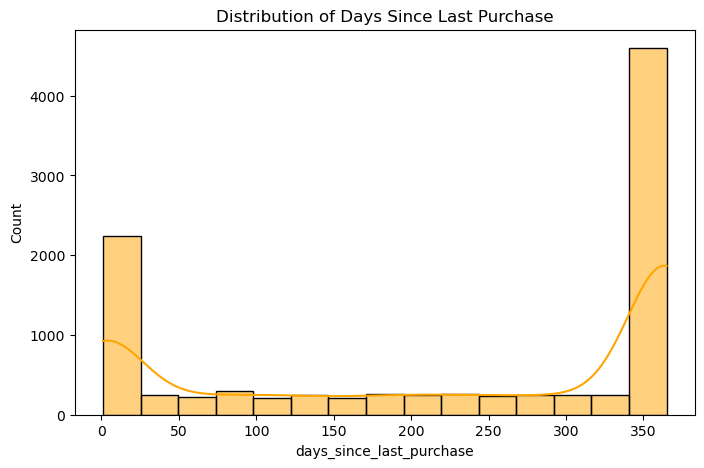

In [55]:
### Check distributions of spending and days since the last purchase
plt.figure(figsize=(8, 5))
sns.histplot(data['days_since_last_purchase'], kde=True, color='orange')
plt.title("Distribution of Days Since Last Purchase")
plt.show()


In [56]:
###We can drop 
data = data.drop(columns=['customer_id', 'customer_name'])


In [57]:
data

,age,income_level,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,refunds,location,bonus_amount_received
0,18,Medium,365,217,100,45652.568412,456.525684,877,0.706352,2987.613718,0,5,Rural,24.826284
1,39,Low,365,258,2653,4277.094805,1.612173,911,1.480141,388.023592,0,0,Suburban,55.198547
2,30,Low,1,250,476,48111.691777,101.074983,96,1.678426,176.329616,0,0,Urban,33.575846
3,18,Medium,365,77,100,47829.067377,478.290674,702,1.511669,2325.794544,0,4,Urban,25.914534
4,61,Medium,365,312,948,15231.434496,16.066914,836,0.731040,1578.717741,0,2,Urban,26.575717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26,Low,312,122,100,50000.000000,500.000000,434,1.132914,933.648735,0,0,Suburban,27.000000
9996,52,Medium,1,278,2100,50000.000000,23.809524,12,0.621752,4180.949553,0,4,Suburban,67.000000
9997,45,High,8,353,2438,50000.000000,20.508614,361,1.518412,2490.318183,0,3,Suburban,73.760000
9998,55,High,239,54,3502,14940.406429,4.266250,293,0.637675,2326.780839,0,1,Suburban,77.510203


In [ ]:

## Feature Scaling
##Normalize numerical columns to ensure uniform scaling:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])



In [59]:
data[numerical_features] 

,age,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,refunds,bonus_amount_received
0,-1.610156,0.912121,0.197900,-0.985935,0.322905,2.395653,1.309844,-1.252657,0.309630,-0.984126,1.453073,-0.521969
1,-0.077932,0.912121,0.620167,1.239629,-0.702152,-0.621721,1.427418,0.532725,-1.520052,-0.984126,-1.470262,0.706704
2,-0.734600,-1.476112,0.537774,-0.658159,0.383829,0.038001,-1.390899,0.990233,-1.669049,-0.984126,-1.470262,-0.168016
3,-1.610156,0.912121,-1.243987,-0.985935,0.376827,2.540017,0.704684,0.605471,-0.156182,-0.984126,0.868406,-0.477945
4,1.527256,0.912121,1.176324,-0.246695,-0.430763,-0.525845,1.168064,-1.195693,-0.682000,-0.984126,-0.300928,-0.451197
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.026452,0.564384,-0.780524,-0.985935,0.430611,2.684012,-0.222075,-0.268439,-1.136022,-0.984126,-1.470262,-0.434034
9996,0.870588,-1.476112,0.826151,0.757555,0.430611,-0.474489,-1.681375,-1.447857,1.149540,-0.984126,0.868406,1.184117
9997,0.359847,-1.430184,1.598591,1.052204,0.430611,-0.496384,-0.474513,0.621028,-0.040384,-0.984126,0.283739,1.457585
9998,1.089477,0.085425,-1.480869,1.979741,-0.437973,-0.604117,-0.709661,-1.411116,-0.155487,-0.984126,-0.885595,1.609295


In [60]:
## Encode the Categorical Variables
from sklearn.preprocessing import LabelEncoder


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  float64
 1   income_level                10000 non-null  object 
 2   days_since_last_purchase    10000 non-null  float64
 3   active_days                 10000 non-null  float64
 4   total_number_of_purchases   10000 non-null  float64
 5   total_amount_spent          10000 non-null  float64
 6   avg_amount_spent            10000 non-null  float64
 7   days_since_first_purchase   10000 non-null  float64
 8   purchase_frequency          10000 non-null  float64
 9   last_purchase_amount        10000 non-null  float64
 10  seasonal_purchase_behavior  10000 non-null  float64
 11  refunds                     10000 non-null  float64
 12  location                    10000 non-null  object 
 13  bonus_amount_received       1000

In [62]:
categorical_columns = data.select_dtypes(include = 'object')
categorical_columns

,income_level,location
0,Medium,Rural
1,Low,Suburban
2,Low,Urban
3,Medium,Urban
4,Medium,Urban
...,...,...
9995,Low,Suburban
9996,Medium,Suburban
9997,High,Suburban
9998,High,Suburban


In [63]:
#Find the first five rows
data.head()

,age,income_level,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,refunds,location,bonus_amount_received
0,-1.610156,Medium,0.912121,0.197900,-0.985935,0.322905,2.395653,1.309844,-1.252657,0.309630,-0.984126,1.453073,Rural,-0.521969
1,-0.077932,Low,0.912121,0.620167,1.239629,-0.702152,-0.621721,1.427418,0.532725,-1.520052,-0.984126,-1.470262,Suburban,0.706704
2,-0.734600,Low,-1.476112,0.537774,-0.658159,0.383829,0.038001,-1.390899,0.990233,-1.669049,-0.984126,-1.470262,Urban,-0.168016
3,-1.610156,Medium,0.912121,-1.243987,-0.985935,0.376827,2.540017,0.704684,0.605471,-0.156182,-0.984126,0.868406,Urban,-0.477945
4,1.527256,Medium,0.912121,1.176324,-0.246695,-0.430763,-0.525845,1.168064,-1.195693,-0.682000,-0.984126,-0.300928,Urban,-0.451197


### Step 5: Regression Model Building

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# Imports for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Description of each metric:
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# R-squared (R2 Score)


- Splitting Data

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  float64
 1   income_level                10000 non-null  object 
 2   days_since_last_purchase    10000 non-null  float64
 3   active_days                 10000 non-null  float64
 4   total_number_of_purchases   10000 non-null  float64
 5   total_amount_spent          10000 non-null  float64
 6   avg_amount_spent            10000 non-null  float64
 7   days_since_first_purchase   10000 non-null  float64
 8   purchase_frequency          10000 non-null  float64
 9   last_purchase_amount        10000 non-null  float64
 10  seasonal_purchase_behavior  10000 non-null  float64
 11  refunds                     10000 non-null  float64
 12  location                    10000 non-null  object 
 13  bonus_amount_received       1000

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [68]:
# Assuming 'data' is your DataFrame containing all the features and target variable
# Define features (X) and target (y)
X = data[['age', 'income_level', 'days_since_last_purchase', 'active_days', 
          'total_number_of_purchases', 'total_amount_spent', 'avg_amount_spent',
          'days_since_first_purchase', 'purchase_frequency', 'last_purchase_amount',
          'seasonal_purchase_behavior', 'refunds', 'location']]

y = data['bonus_amount_received']


In [69]:
# Categorical columns
categorical_cols = ['income_level', 'location']

# Initialize a dictionary to store the encoders
label_encoders = {}

# Apply LabelEncoder to each categorical column and transform data
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Fit and transform the column
    label_encoders[col] = le  # Save the encoder for future use

C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\2091578494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Fit and transform the column
C:\Users\sm689\AppData\Local\Temp\ipykernel_11904\2091578494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Fit and transform the column


In [70]:
label_encoders

{'income_level': LabelEncoder(), 'location': LabelEncoder()}

In [71]:
X

,age,income_level,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,refunds,location
0,-1.610156,2,0.912121,0.197900,-0.985935,0.322905,2.395653,1.309844,-1.252657,0.309630,-0.984126,1.453073,0
1,-0.077932,1,0.912121,0.620167,1.239629,-0.702152,-0.621721,1.427418,0.532725,-1.520052,-0.984126,-1.470262,1
2,-0.734600,1,-1.476112,0.537774,-0.658159,0.383829,0.038001,-1.390899,0.990233,-1.669049,-0.984126,-1.470262,2
3,-1.610156,2,0.912121,-1.243987,-0.985935,0.376827,2.540017,0.704684,0.605471,-0.156182,-0.984126,0.868406,2
4,1.527256,2,0.912121,1.176324,-0.246695,-0.430763,-0.525845,1.168064,-1.195693,-0.682000,-0.984126,-0.300928,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.026452,1,0.564384,-0.780524,-0.985935,0.430611,2.684012,-0.222075,-0.268439,-1.136022,-0.984126,-1.470262,1
9996,0.870588,2,-1.476112,0.826151,0.757555,0.430611,-0.474489,-1.681375,-1.447857,1.149540,-0.984126,0.868406,1
9997,0.359847,0,-1.430184,1.598591,1.052204,0.430611,-0.496384,-0.474513,0.621028,-0.040384,-0.984126,0.283739,1
9998,1.089477,0,0.085425,-1.480869,1.979741,-0.437973,-0.604117,-0.709661,-1.411116,-0.155487,-0.984126,-0.885595,1


In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
#Split the Training and Test Data 
print("X_train Shape:-",X_train.shape)
print("X_test Shape:-",X_test.shape)
print("y_train Shape:-",y_train.shape)
print("y_test Shape:-",y_test.shape) 

X_train Shape:- (8000, 13)
X_test Shape:- (2000, 13)
y_train Shape:- (8000,)
y_test Shape:- (2000,)


In [ ]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

In [75]:
# Iterate over each model in the models dictionary and fit the model
# Training and evaluating models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} - MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"{model_name} - Mean Absoulte Error:")
    print(mean_absolute_error(y_test, y_pred))
    print(f"{model_name} - R2 Model:")
    print(r2_score(y_test, y_pred))
    print("--" * 50)

Training Linear Regression...
Linear Regression - MSE: 0.0746
Linear Regression - Mean Absoulte Error:
0.21015534160263802
Linear Regression - R2 Model:
0.9223113403095459
----------------------------------------------------------------------------------------------------
Training Decision Tree...
Decision Tree - MSE: 0.0026
Decision Tree - Mean Absoulte Error:
0.022081597895300946
Decision Tree - R2 Model:
0.9972768193427557
----------------------------------------------------------------------------------------------------
Training Random Forest...
Random Forest - MSE: 0.0010
Random Forest - Mean Absoulte Error:
0.01239580881785076
Random Forest - R2 Model:
0.9989245021247796
----------------------------------------------------------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - MSE: 0.0015
Gradient Boosting - Mean Absoulte Error:
0.02330536380936475
Gradient Boosting - R2 Model:
0.9984760304125672
----------------------------------------

In [76]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor()
# Fit the model with training data
xgb_model.fit(X_train, y_train)
# Predict on the test data
y_pred = xgb_model.predict(X_test)


In [77]:
y_pred #Prediction with XGB Regressor

array([-1.1851078 , -0.34452513, -0.19953312, ...,  2.4086192 ,
        0.46825066,  0.20317183], dtype=float32)

In [78]:
# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred)) 

Mean Absolute Error: 0.015906204360677453
Mean Squared Error: 0.00098047615416293
R2 Score: 0.9989785343788768


In [79]:
###Initialize the Random Forst Model
rf_model =  RandomForestRegressor(random_state=42)
# Fit the model with training data
rf_model.fit(X_train, y_train)
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [80]:
y_pred  #Predictions with the Random Forest Regressor

array([-1.19239276, -0.35110043, -0.1968309 , ...,  2.47879516,
        0.47367844,  0.23365817])

In [81]:
##

In [82]:
##########################################################################################################3

### **Why Random Forest is Better Here**

- 1.Handles Non-Linearity
    - If there are any non-linear interactions between features and the target variable (even minor ones), Random Forest will capture them effectively.

- 2.Generalization
    - Random Forest uses bagging (bootstrap aggregation) to reduce overfitting, making it better suited for datasets with complex structures or noise.

- 3.Feature Importance
    - Random Forest provides insights into which features are most important for predicting the target, which can help guide business decisions.

- 4.Excellent Performance
    - Your testing metrics for Random Forest show near-perfect performance with minimal errors. 
    - It performs slightly better than other models, including Linear Regression.

- 5.Resilient to Outliers and Missing Data:
    - Unlike Linear Regression, Random Forest can handle datasets with irregularities like outliers or minor data imperfections.    

In [83]:
#################################################################################################


### **When Random Forest Might Be a Better Fit**

- Real-world Scenarios: 
    - Retail and customer loyalty problems often have non-linear patterns that Random Forest captures effectively.

- Predictive Power: 
    - If the focus is on accurate predictions and the model doesn’t need to be overly interpretable, Random Forest is ideal.

- Scalability: 
    - While Random Forest is more computationally intensive than Linear Regression, it’s still manageable for most datasets.

### Save the Random Forest model in a pickle file

In [ ]:
import pickle
#Save the Encoders to a Pickle File 
with open("label_encoders.pkl","wb") as encoder_file:
    pickle.dump(label_encoders,encoder_file) 

print("Model and encoder saved!")


Model and encoder saved!


In [ ]:
import pickle

# `rf_model` is the trained Random Forest model
# Saving the model to a pickle file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as 'rf_model.pkl'")


Model saved as 'rf_model.pkl'


### Loading the saved model:

In [ ]:
# Loading the saved model
with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file) 

#use the `loaded_model` for predictions
predictions = loaded_model.predict(X_test)


In [87]:
predictions 

array([-1.19239276, -0.35110043, -0.1968309 , ...,  2.47879516,
        0.47367844,  0.23365817])

In [ ]:
#print some predictions of saved RF Model
print(predictions[:10])  # Print the first 10 predictions

[-1.19239276 -0.35110043 -0.1968309  -1.38739296  1.66043338  0.26706221
  0.2735805   0.17720672 -0.26585693  2.0136244 ]


In [89]:
##############################################################################################

### What to Keep in Mind
- Interpretability:
    - Random Forest is less interpretable than Linear Regression. If stakeholders need simple explanations, this might be a drawback.
- Overfitting Risk:
    - Random Forest usually prevents overfitting, but tuning parameters like the number of trees (n_estimators) and depth (max_depth) is crucial.

In [90]:
############################################################################